# Capstone
## Machine Learning Engineer Nanodegree
## Build Models

### Load data and split train/test

In [2]:
# load data
import pandas as pd
data = pd.read_csv('C:/Users/youch/Desktop/2017fall/september_jmx/credit_default_pre.csv')

In [54]:
data = data.drop('ID',axis = 1)

In [55]:
data.head()

LIMIT_BAL       AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
0   0.150507  0.099020    0.4    0.4    0.1    0.1    0.0    0.0   0.149982   
1   0.539582  0.158634    0.1    0.4    0.2    0.2    0.2    0.4   0.148892   
2   0.477112  0.359652    0.2    0.2    0.2    0.2    0.2    0.2   0.172392   
3   0.349475  0.423354    0.2    0.2    0.2    0.2    0.2    0.2   0.188100   
4   0.349475  0.750900    0.1    0.2    0.1    0.2    0.2    0.2   0.154144   

   BILL_AMT2     ...      EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4  \
0   0.069164     ...                0            1            0            0   
1   0.067858     ...                0            1            0            0   
2   0.079532     ...                0            1            0            0   
3   0.111995     ...                0            1            0            0   
4   0.071601     ...                0            1            0            0   

   EDUCATION_5  EDUCATION_6  MARRIAGE_0  MARRIAGE_1  MARRIAGE_2  MARRIAGE_3  
0            0            0           0           1           0           0  
1            0            0           0           0           1           0  
2            0            0           0           0           1           0  
3            0            0           0           1           0           0  
4            0            0           0           1           0           0  

[5 rows x 34 columns]

In [56]:
# Splitting data to train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data.drop('default payment next month',axis=1),
                                                data['default payment next month'],test_size = 0.2,random_state = 42)

## Choose classifiers based on 3 datasets

###  Supervised Learning Models
**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that I choose from:**
- GradientBoosting Classifier
- RandomForest Classifier
- Logistic Regression

###  Three datasets
- Imbalanced dataset
- Oversampling
- Undersampling

In [5]:
# import necessary modules
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
# evaluate classifiers based on Fbetascore and 
# FNR:false negative rate
def evaluation_function(classifier,x_train,y_train,x_test,y_test):
    """Input classifier and train/test data, return Fbetascore and False negative rate"""
    classifier.fit(x_train,y_train)
    predicted_labels = classifier.predict(x_test)
    TP,TN,FP,FN = 0,0,0,0
    for i in range(len(predicted_labels)):
        if predicted_labels[i] == y_test.values[i] == 1:
            TP += 1
        elif predicted_labels[i] == y_test.values[i] == 0:
            TN += 1
        elif predicted_labels[i] ==1 and y_test.values[i] == 0:
            FP += 1
        else:
            FN += 1
    FNR = float(FP)/float(TP+FP)
    fbeta = fbeta_score(y_test, predicted_labels, beta = 0.5)
    print 'For the learner',classifier,'the false negative rate is {} and the f0.5beta score is {}'.format(FNR,fbeta)

In [12]:
def evaluation_final(classifier,x_train,y_train,x_test,y_test):
    """Input classifier and train/test data, return Fbetascore and False negative rate"""
    classifier.fit(x_train,y_train)
    predicted_labels = classifier.predict(x_test)
    predicted_train = classifier.predict(x_train)
    TP,TN,FP,FN = 0,0,0,0
    for i in range(len(predicted_labels)):
        if predicted_labels[i] == y_test.values[i] == 1:
            TP += 1
        elif predicted_labels[i] == y_test.values[i] == 0:
            TN += 1
        elif predicted_labels[i] ==1 and y_test.values[i] == 0:
            FP += 1
        else:
            FN += 1
    FNR = float(FP)/float(TP+FP)
    fbeta = fbeta_score(y_test, predicted_labels, beta = 0.5)
    accuracy_test = accuracy_score(y_test, predicted_labels)
    accuracy_train = accuracy_score(y_train, predicted_train)
    print 'For the learner',classifier,'the false negative rate is {} and the f0.5beta score is {}'.format(FNR,fbeta)
    print 'The training accuracy is {} and the testing accuracy is {}'.format(accuracy_train, accuracy_test)

#### Choose classifier for imbalanced dataset:

In [6]:
# evaluate 3 classifiers to see which classifier performed best in Fbetascore and False negative rate
evaluation_function(GradientBoostingClassifier(), x_train, y_train, x_test, y_test)
evaluation_function(RandomForestClassifier(), x_train, y_train, x_test, y_test)
evaluation_function(LogisticRegression(), x_train, y_train, x_test, y_test)

For the learner GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False) the false negative rate is 0.337110481586 and the f0.5beta score is 0.565627266135
For the learner RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=

Based on the results above, we should choose GradientBoostingClassifier as our learner since the f0.5beta score is the highest among 3 classifiers, and the false negative rate is also relatively low. However the false negative rate, 0.34, is still very high. It means out of 100 customers who are going to default, we will misclassified approximately 34 customers to be not going to default, which is not good. That might because the data imbalancement issue. We need to figure our it later.

#### Choose classifier for undersampling dataset:

In [61]:
# construct undersampling dataset
import numpy as np
import random

def undersampling(data,major_label,minor_label,label_name):
    major_index = data[data[label_name] == major_label].index
    len_minor = len(data[data[label_name] == minor_label].index)
    random.seed(42)
    labels = random.sample(major_index,len_minor)
    reduced_major = pd.DataFrame()
    for i in labels:
        temp = data.loc[[i]]
        reduced_major = pd.concat([reduced_major,temp])
    under_df = pd.concat([reduced_major,  data[data[label_name] == minor_label]])
    return under_df

In [82]:
xy_train = pd.concat([x_train,y_train],axis = 1)
under_df = undersampling(xy_train,0,1,'default payment next month')

In [83]:
ux_train = under_df.drop('default payment next month',axis=1)
uy_train = under_df['default payment next month']

In [84]:
# evaluate 3 classifiers to see which classifier performed best in Fbetascore and False negative rate
evaluation_function(GradientBoostingClassifier(), ux_train, uy_train, x_test, y_test)
evaluation_function(RandomForestClassifier(), ux_train, uy_train, x_test, y_test)
evaluation_function(LogisticRegression(), ux_train, uy_train, x_test, y_test)

For the learner GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False) the false negative rate is 0.542122538293 and the f0.5beta score is 0.485217391304
For the learner RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=

Choose GBC as the classifier for undersampling dataset

#### Choose classifier for oversampling dataset:

In [50]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_sample(x_train,y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 18677, 1: 5323})
Resampled dataset shape Counter({0: 18677, 1: 18677})


In [51]:
# traning/testing splitting
ox_train,ox_test,oy_train,oy_test = train_test_split(x_res,y_res,test_size = 0.2,random_state = 42)

In [52]:
# because oversampling dataset consists of array, we need to modify evaluation function a little bit
def evaluation_function(classifier,x_train,y_train,x_test,y_test):
    """Input classifier and train/test data, return Fbetascore and False negative rate"""
    classifier.fit(x_train,y_train)
    predicted_labels = classifier.predict(x_test)
    TP,TN,FP,FN = 0,0,0,0
    for i in range(len(predicted_labels)):
        if predicted_labels[i] == y_test[i] == 1:
            TP += 1
        elif predicted_labels[i] == y_test[i] == 0:
            TN += 1
        elif predicted_labels[i] ==1 and y_test[i] == 0:
            FP += 1
        else:
            FN += 1
    FNR = float(FP)/float(TP+FP)
    fbeta = fbeta_score(y_test, predicted_labels, beta = 0.5)
    print 'For the learner',classifier,'the false negative rate is {} and the f0.5beta score is {}'.format(FNR,fbeta)

In [67]:
# evaluate 3 classifiers to see which classifier performed best in Fbetascore and False negative rate
evaluation_function(GradientBoostingClassifier(), x_res, y_res, x_test, y_test)
evaluation_function(RandomForestClassifier(), x_res, y_res, x_test, y_test)
evaluation_function(LogisticRegression(), x_res, y_res, x_test, y_test)

For the learner GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False) the false negative rate is 0.392307692308 and the f0.5beta score is 0.558247526751
For the learner RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=

Choose GBC for oversampling dataset

## Parameter Tuning

###  Supervised Learning Models
- GradientBoosting Classifier for imbalanced dataset and undersampling dataset
- RandomForest Classifier for oversampling dataset

In [71]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [73]:
# initialize GBC paramters wants to try
params_gboost = {'learning_rate':[0.05,0.1,0.2],
                 # 0.5%-1% of data
                'min_samples_split':[300],
                 'n_estimators':[100],
                'max_depth':[15],
                 # help to prevent overfitting
                'min_samples_leaf':[30]}

In [74]:
def optimize_model(classifier,params2try,x_train,y_train,x_test,y_test):
    """Employ grid search to find the best parameter for the classifier. Grid search is based on Fbetascore"""
    
    clf = classifier(random_state=42)
    scorer = make_scorer(fbeta_score, beta=0.5)
    
    grid_search = GridSearchCV(clf,param_grid = params2try,scoring = scorer)
    #train data on training set using grid search and find the best model with certain paramters
    grid_train = grid_search.fit(x_train,y_train)
    optimized_clf = grid_train.best_estimator_
    
    # predcition on testing data
    unoptimized_preds = (clf.fit(x_train,y_train)).predict(x_test)
    optimized_preds = optimized_clf.predict(x_test)
    

    print ("Unoptimized model\n------")
    print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, unoptimized_preds, beta = 0.5)))
    print ("\nOptimized Model\n------")
    print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, optimized_preds, beta = 0.5)))
    print optimized_clf

#### Try with imbalanced data

In [35]:
# get Fbetascore and best classifier
optimize_model(GradientBoostingClassifier,params_gboost,x_train,y_train,x_test,y_test)

Unoptimized model
------
F-score on testing data: 0.5656

Optimized Model
------
Final F-score on the testing data: 0.5823
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=15,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=30, min_samples_split=300,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)


In [7]:
# initialize best classifier
optimized_GBC = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=15,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=30, min_samples_split=300,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [40]:
evaluation_function(optimized_GBC, x_train, y_train, x_test, y_test)

For the learner GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=15,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=30, min_samples_split=300,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False) the false negative rate is 0.324657534247 and the f0.5beta score is 0.582329317269


Compared to classifier, GBC, with default setting, the GBC after parameter tunning performed slightly better both in false negative rate and in f0.5beta score.

### Try with balanced data: undersampling

In [46]:
optimize_model(GradientBoostingClassifier,params_gboost,ux_train,
               uy_train,x_test,y_test)

Unoptimized model
------
F-score on testing data: 0.4973

Optimized Model
------
Final F-score on the testing data: 0.5140
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=15,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=30, min_samples_split=300,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)


In [48]:
opt_for_under = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=15,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=30, min_samples_split=300,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

### Notice:
Knowing that if we want to evaluate wether using a undersampling dataset is good or not, we should control: test data. So we should check the performance on x_test we've already splitted.

In [49]:
evaluation_function(opt_for_under, ux_train,
               uy_train, x_test, y_test)

For the learner GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=15,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=30, min_samples_split=300,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False) the false negative rate is 0.520485584219 and the f0.5beta score is 0.514044029932


Our model feed with undersampling data performed worse! The false negative rate went up a lot and f0.5beta score went down a lot! That's might due to that we have less data available. Let's try oversampling.

### try with balanced data: oversampling

In [75]:
optimize_model(GradientBoostingClassifier,params_gboost,x_res,y_res,x_test,y_test)

Unoptimized model
------
F-score on testing data: 0.5582

Optimized Model
------
Final F-score on the testing data: 0.5465
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=15,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=30, min_samples_split=300,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)


In [27]:
opt_for_over = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=15,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=30, min_samples_split=300,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [31]:
evaluation_function(opt_for_over, x_res,y_res, x_test, y_test)

For the learner GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=15,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=30, min_samples_split=300,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False) the false negative rate is 0.400452488688 and the f0.5beta score is 0.546504433904


Comparing with benchmark model:

In [57]:
evaluation_final(optimized_GBC, x_train, y_train, x_test, y_test)

For the learner GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=15,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=30, min_samples_split=300,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False) the false negative rate is 0.324657534247 and the f0.5beta score is 0.582329317269
The training accuracy is 0.853541666667 and the testing accuracy is 0.823833333333


### Free-Form Visualization

In [50]:
import matplotlib.pyplot as plt
import numpy as np
def feature_importance(importances, x_train, y_train):
    
    # Display the eight most important features
    indices = np.argsort(importances)[::-1]
    columns = x_train.columns.values[indices[:8]]
    values = importances[indices][:8]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(8), values, width = 0.6, align="center", color = 'steelblue', \
          label = "Feature Weight",alpha = 0.8)
    plt.bar(np.arange(8) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = 'steelblue', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(8), columns)
    plt.xlim((-0.5, 7.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  

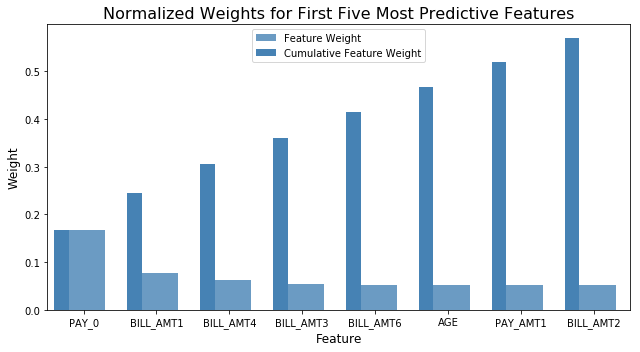

In [58]:
model = optimized_GBC

# TODO: Extract the feature importances
importances =  model.feature_importances_

# Plot
feature_importance(importances, x_train, y_train)

In [59]:
xy_train = pd.concat([x_train,y_train],axis = 1)